In [1]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import hist
import narf
import numpy as np

Welcome to JupyROOT 6.27/01


In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
groups = datagroups2016("../mw_with_mu_eta_pt.pkl.lz4")


In [37]:
groups.results["WplusmunuPostVFP"]["output"][

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=9.53812e+08, variance=1.55096e+09) (WeightedSum(value=1.10806e+09, variance=1.75344e+09) with flow)

In [23]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst_responseWeights", procsToRead=["Wmunu"])
procDict = groups.getDatagroups()

In [38]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", procsToRead=["Wmunu"])
procDict = groups.getDatagroups()

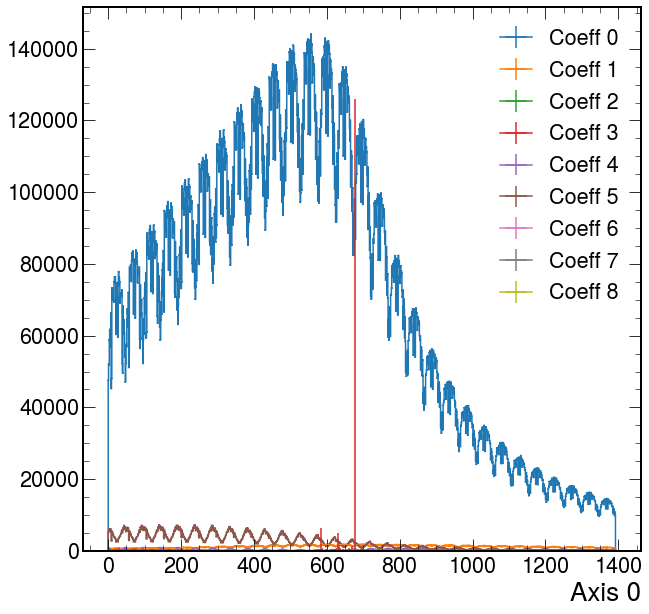

In [44]:
for i in range(9):
    sel.unrolledHist(procDict["Wmunu"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i}]).plot(label=f"Coeff {i}")
plt.legend()
    

In [ ]:
hscaleUp = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 1, "scaleEtaSlice" : 1.j}]
hscaleDown = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 0, "scaleEtaSlice" : 1.j}]

In [ ]:
hnom = procDict["Wmunu"]["nominal"]
# Can also read specific samples by accessing the original 
hnomminus = groups.results["WminusmunuPostVFP"]["output"]["nominal"]

In [ ]:
hscaleUp.project("pt").plot()

In [ ]:
hh.divideHists(hscaleUp.project("pt"), hnom.project("pt")).plot()
hh.divideHists(hscaleDown.project("pt"), hnom.project("pt")).plot()
plt.ylim([0.995, 1.005])

In [ ]:
combine = datagroups2016("../temp/WMassCombineInput.root")

In [ ]:
procs = combine.datagroupsForHist("x_Wmunu_plus", label="nominal")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Up_plus", label="scaleEta0Up")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Down_plus", label="scaleEta0Down")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Up_plus", label="pdf1Up")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Down_plus", label="pdf1Down")

In [ ]:
hh.divideHists(procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["nominal"]).plot()
hh.divideHists(procs["Wmunu"]["scaleEta0Down"], procs["Wmunu"]["nominal"]).plot()
#plt.ylim([0.99, 1.01])

In [ ]:
hmirror = hh.mirrorHist(hnom, procs["Wmunu"]["pdf1Up"])

In [ ]:
hh.divideHists(procs["Wmunu"]["pdf1Up"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
hh.divideHists(procs["Wmunu"]["pdf1Down"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
plt.ylim([0.99, 1.01])

In [ ]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["scaleEta0Down"]]]
#hists = [h.project("pt") for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "scaleEta0Up", "scaleEta0Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.998, 1.002])


In [ ]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "pdf1Up", "pdf1Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.995, 1.005])


In [ ]:
histInfo = groups.datagroupsForHist("nominal", selectSignal=True, label="nominal", procsToRead=["Wmunu"])


In [ ]:
histInfo = groups.datagroupsForHist("", syst="qcdScaleByHelicity", selectSignal=True, label="qcdScaleByHelicity", procsToRead=["Wmunu"], forceNonzero=False)

In [ ]:
histInfo["qcdScaleByHelicity"]

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicitySum"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"])

In [ ]:
s = hist.tag.Slicer()
hVarNom = histInfo["Wmunu"]["qcdScaleByHelicity"][{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]


In [ ]:
selections = [{"muRfact" : hist.loc(j), "muFfact" : hist.loc(j), "helicity" : i, "ptVgen" : 0, "chargeVgen" : -1j} for i in range(2) for j in [0.5,1.,2.]]
names = [f"muR{j}_muF{j}_hel_sigma{i}_ptVgen0_minus" for i in range(2) for j in [0.5,1.,2.]]

In [ ]:
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySum"][s]) for s in selections])
labels = ["nominal"]+names
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue"]

In [ ]:
hists = [histInfo["Wmunu"]["nominal"].project("pt")]
hists.append(hVarNom.project("pt"))
hists.extend([histInfo["Wmunu"]["qcdScaleByHelicitySum"][s].project("pt") for s in selections])

In [ ]:
fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", scale=3e5,rrange=[0.99, 1.01])

In [ ]:
selections = [{"muRfact" : hist.loc(j), "muFfact" : hist.loc(j), "chargeVgen" : i, "helicity" : 0} for i in [0, 1] for j in [0.5,1.,2.]]
histInfo["Wmunu"]["qcdScaleByHelicitySumCoeff"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"], sum_ptV=True)
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySumCoeff"][s]) for s in selections])
labels = ["nominal"]+names
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue"]
print(len(hists), len(labels), len(colors))
fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", scale=3e5,rrange=[0.99, 1.01])

In [ ]:
nom_scale_hist = scale_hist[{"muRfact" : s[1.j:1.j+1], "muFfact" : s[1.j:1.j+1]}]
nom_hist = nom_scale_hist[{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]

In [ ]:
expd = scale_hist.ndim - nom_hist.ndim

In [ ]:
np.expand_dims(nom_hist, [-expd+i for i in range(expd)]).shape

In [ ]:
histInfo["Wmunu"]["nominal"].project("pt").plot()
histInfo["Wmunu"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()

In [ ]:
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 0.5j, "muFfact" : 0.5j}].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 0.5j, "muFfact" : 1.j}].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 2.j}].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 2.j, "muFfact" : 2.j}].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 2.j, "muFfact" : 1.j}].sum(flow=True))

In [ ]:
print(groups.results["WminusmunuPostVFP"]["output"]["nominal"].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True))


In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WplusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
#groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"]
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig = groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"].copy()
orig

In [ ]:
orig_sum = orig +  groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig_sum.sum(flow=True)

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]